In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # graphics - not preferred
%matplotlib inline
import seaborn as sns # graphics - preferred

from scipy import stats
import statsmodels.api as sm # models - not preferred
from sklearn import linear_model # models - preferred

# get current working directory. Useful if getting errors about file loading.
import os

print os.getcwd()
print

# create a dataframe names 'dates' with the values specified below)
# dates = pd.date_range('20140101',periods=6)
# dates

df_raw = pd.read_csv("../final-project/data/17_11_Unit_Level_Peril_Fire.csv")

# drop all rows with one or more values that are not available
# df = df_raw.dropna() 

df = df_raw

# print the first record in the dataframe called df
# print df.head(1)

# print the coloumn names of the columns in the dataframe called df
print df.columns.values
print

# print the indez values of the rows in the dataframe called df
# print df.index.values

# print the number of rows in the dataframe called df
print len(df)
print

# print the specs of the dataframe called df
# print df.describe()

# print row 5 of the dataframe called df. Print it as a dataframe. Note: first row is 0 etcetera
# better to use loc or iloc function instead of ix since ix is being retired in newer python versions
# print df.ix[[4,]]
# print

# what is the average indemnity paid amount per record when the unit_type is equal
# to ALE
print df[df['UNIT_TYPE'] == 'ALE']['TOTAL_INDEMNITY_AMOUNT'].mean()
print df[ df.UNIT_TYPE=='ALE' ]['TOTAL_INDEMNITY_AMOUNT'].mean()  # notice how we can access the column as a variable instead of an array string index
print df[ df.UNIT_TYPE=='ALE' ].TOTAL_INDEMNITY_AMOUNT.mean()  # same here!
print

# determine all the possible values of UNIT_TYPE
# show for each value the mean

print df['TOTAL_INDEMNITY_AMOUNT'].mean()
print

# what is the average indemnity paid amount per record when you exclude zero values
print df[ df.TOTAL_INDEMNITY_AMOUNT != 0 ].TOTAL_INDEMNITY_AMOUNT.mean()
print

# ???? determine all the possible values of UNIT_TYPE
# ???? show for each value the mean



# create dummy variables using get_dummies for all possible values of UNIT_TYPE then exclude the first dummy column
area_dummies = pd.get_dummies(df.UNIT_TYPE, prefix='UNIT_TYPE').iloc[:, 1:]
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
# note: concatenate allows you to combine two matrices next to eachother (make sure they have
# the same number of rows!!!)
df10 = pd.concat([df, area_dummies], axis=1)
print df10.head()


/Applications/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/Users/jnmbloem/DAT-SM-18/projects/final-project

['UNIT_NUMBER' 'UNIT_TYPE' 'CURRENT_UNIT_STATUS' 'UNIT_CREATED_DATE'
 'CLAIM_CREATED_DATE' 'CLAIM_SEGMENT_NUMBER' 'LOSS_DATE' 'LOSS_LOC_STATE'
 'LOC_ZIP5' 'CURRENT_CLAIM_STATUS' 'CAUSE_OF_LOSS' 'CAT_CODE' 'CAT_FLAG'
 'POLICY_STATE' 'POLICY_NUMBER' 'POLICY_DESCRIPTION' 'INSURANCE_GRP_IND'
 'COVERAGE_SOURCE' 'PRODUCT_TYPE' 'POLICY_FORM_NUMBER'
 'CLAIM_CREATED_MONTH' 'CLAIM_CREATED_YEAR' 'TOTAL_INDEMNITY_AMOUNT'
 'CURRENT_RESERVE_AMOUNT' 'ACV_AMOUNT' 'RCV_AMOUNT' 'MISCODE_AMOUNT'
 'UNIT_COUNT' 'PAID_COUNT' 'RESERVE_COUNT' 'CWP_COUNT' 'UNIT_CATEGORY'
 'PAYMENT_CATEGORY' 'PAYMENT_BAND' 'EMPLOYEE_LOGIN' 'HEART_EMPLOYEE_NAME'
 'HEART_DIVISION_NAME' 'HEART_BCO' 'HEART_ZONE' 'HEART_LOB'
 'OLEM_SUPERVISOR_LAST_FST_NAME' 'OLEM_MANAGER_LAST_FST_NAME' 'OLEM_LOB'
 'OLEM_INTERDEPTPOSITION' 'OLEM_ZONE' 'OLEM_TERRITORY' 'OLEM_BCO' 'CHANNEL'
 'GROUPED_POLICY_STATE_27' 'GROUPED_POLICY_STATE_29' 'LP_APT_FLAG'
 'INCURRED_AMOUNT' 'INCURRED_COUNT' 'INCURRED_B

In [177]:
df.UNIT_TYPE.value_counts()

Building         13387
Contents         10717
Subrogation      10153
ALE               6620
Coverage          1152
Salvage            855
EMRP               612
SIU                512
Investigation      464
Flooring           160
Property            12
PD                   2
Name: UNIT_TYPE, dtype: int64

   ACV_AMOUNT  RCV_AMOUNT
0     2529.89         0.0
1     1950.00         0.0
2    13097.23         0.0
3    47434.42         0.0
4    10600.00         0.0

            ACV_AMOUNT  RCV_AMOUNT
ACV_AMOUNT    1.000000    0.010691
RCV_AMOUNT    0.010691    1.000000

       ACV_AMOUNT  RCV_AMOUNT
31476     5271.79     5271.78
31478        0.00     2010.81
31479        0.00     2866.46
31484        0.00      684.29
31491        0.00     1487.66

            ACV_AMOUNT  RCV_AMOUNT
ACV_AMOUNT    1.000000    0.125029
RCV_AMOUNT    0.125029    1.000000

   TOTAL_INDEMNITY_AMOUNT  ACV_AMOUNT UNIT_TYPE
0                 2529.89     2529.89       ALE
1                 1950.00     1950.00       ALE
2                13097.23    13097.23       ALE
3                47434.42    47434.42       ALE
4                10600.00    10600.00       ALE
19252    4133150.00
17151    3157685.20
19251    3081205.00
13673    2500375.00
14539    2217461.47
Name: TOTAL_INDEMNITY_AMOUNT, dtype: float64
4133150.0


/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


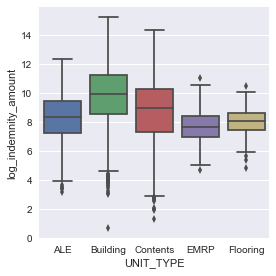

In [3]:
# Create new dataframe with only two columns but all the rows
# Because of double brackets the df2 variable is again a dataframe
df2 = df[['ACV_AMOUNT','RCV_AMOUNT']]
print df2.head(5)
print
print df2.corr()
print

# Create new dataframe, from the dataframe with the two columns, eliminating some rows; 
# the rows where RVC_AMOUNT is zero
df3 = df2[df2.RCV_AMOUNT != 0]
print df3.tail(5)
print
print df3.corr()
print

# show box plot for values of TOTAL_INDEMNITY_AMOUNT only after eliminating 
# rows with TOTAL_INDEMINTY _AMOUNT = 0
df4 = df[['TOTAL_INDEMNITY_AMOUNT', 'ACV_AMOUNT', 'UNIT_TYPE']] # creates df with three columns
df5 = df4[df4.TOTAL_INDEMNITY_AMOUNT != 0] # eliminates specified rows
print df5.head(5)
print df5.TOTAL_INDEMNITY_AMOUNT.sort_values(ascending = False).head(5)
print df.TOTAL_INDEMNITY_AMOUNT.max()

# the TOTAL_INDEMNITY_AMOUNT needs to be log transformed 
# print df5['TOTAL_INDEMNITY_AMOUNT'].apply(np.log).plot(kind="hist") # prints plot of resulting dataframe

# ???? show box plot for values of TOTAL_INDEMNITY_AMOUNT, eliminating rows where
# ???? TOTAL_INDEMNITY_AMOUNT is zero BUT SPLIT BY UNIT_TYPE
# ???? UNIT_TYPES are not different columns; they are a LOV for a specific column

df5['log_indemnity_amount'] = df5.TOTAL_INDEMNITY_AMOUNT.apply(np.log)
sns.factorplot(y='log_indemnity_amount',x='UNIT_TYPE',data = df5, kind='box')

# show box plot for values of TOTAL_INDEMNITY_AMOUNT by UNIT_TYPE
# print df['TOTAL_INDEMNITY_AMOUNT'].plot(kind="box")

# ???? Why does it only execute one of the last to print commands for graphs?


[[<matplotlib.axes._subplots.AxesSubplot object at 0x1167c4c90>
Axes(0.5125,0.125;0.3875x0.3775)


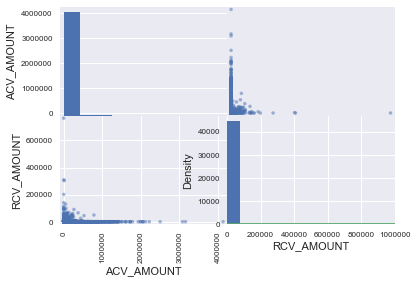

In [128]:
# show scatter plot showing relationship RCV_AMOUNT and ACV_AMOUNT
print pd.plotting.scatter_matrix(df2)



Axes(0.125,0.125;0.775x0.755)


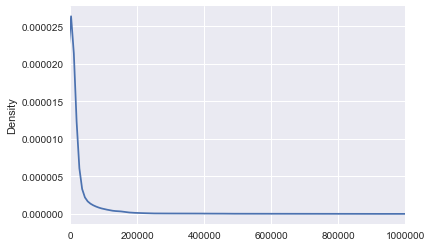

In [129]:
# Let's have a look at the probability densities of the ACV_AMOUNT
print df2["ACV_AMOUNT"].plot(kind="density", xlim=(0,1000000))


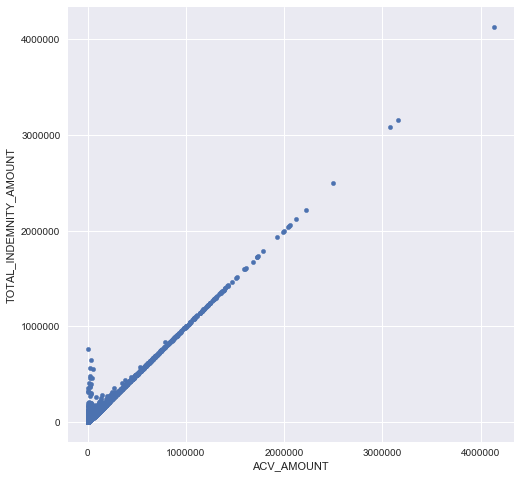

In [134]:
df.plot(kind='scatter', x='ACV_AMOUNT', y='TOTAL_INDEMNITY_AMOUNT', figsize=(8, 8))

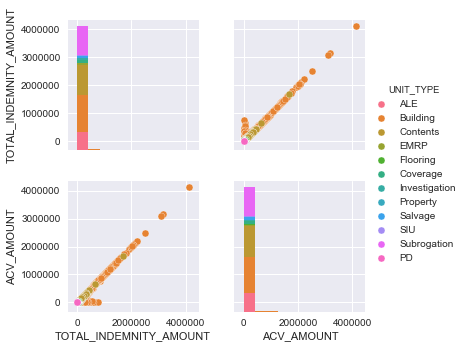

In [150]:
# Quick plot of the data using seaborn which I prefer over mathplotlib
# seaborn is simple and quick but leass configurable than mathplotlib

sns.pairplot(df4, hue="UNIT_TYPE")
sns.plt.show()

In [144]:
# this is the standard import if you're using "formula notation" (similar to R) and use statsmodel
import statsmodels.formula.api as smf

# create a fitted model in one line
# formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
# with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='TOTAL_INDEMNITY_AMOUNT ~ ACV_AMOUNT', data=df).fit()

#print the full summary
print lm.summary()
print
# print the coefficients
print lm.params

                              OLS Regression Results                              
Dep. Variable:     TOTAL_INDEMNITY_AMOUNT   R-squared:                       0.990
Model:                                OLS   Adj. R-squared:                  0.990
Method:                     Least Squares   F-statistic:                 4.544e+06
Date:                    Thu, 28 Dec 2017   Prob (F-statistic):               0.00
Time:                            11:17:05   Log-Likelihood:            -4.7374e+05
No. Observations:                   44646   AIC:                         9.475e+05
Df Residuals:                       44644   BIC:                         9.475e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [141]:
# let's say you want to determine what this model predicts for TOTAL_INDEMNITY_AMOUNT when
# the ACV_AMOUNT is 100,000

# step 1: you have to create a DataFrame to capture the ACV_AMOUNT OF 100,000
# since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'ACV_AMOUNT': [100000]})
X_new.head()

# use the model to make predictions on a new value and print result
print lm.predict(X_new)


0    100674.092437
dtype: float64


In [142]:
# determine confidence in our model
print lm.pvalues
print lm.conf_int()

Intercept     1.267896e-31
ACV_AMOUNT    0.000000e+00
dtype: float64
                     0           1
Intercept   467.424308  655.364761
ACV_AMOUNT    1.000206    1.002048


In [152]:
# from sklearn import linear_model --> I prefer sklearn over statsmodel

X = df[["ACV_AMOUNT"]]
y = df["TOTAL_INDEMNITY_AMOUNT"]

# Select the model to use; in this case linear regression model from sklearn
model = linear_model.LinearRegression()
# Fit the data to the model
results = model.fit(X, y)

# Print the coefficients
print results.intercept_, results.coef_

561.394534569 [ 1.00112698]


/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


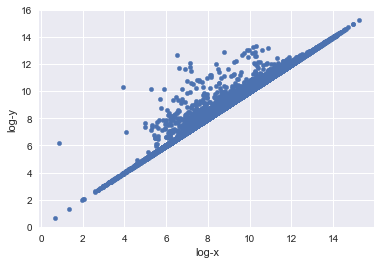

In [190]:
# if the relationship between ACV_TOTAL and TOTAL_INDEMNITY_AMOUNT is linear but error not
# normally distributed (as is the case here), you need to do the log transformation
# to both TOTAT_INDEMNITY_AMOUNT and to "ACV_AMOUNT

df5["log-y"] = np.log(df5['TOTAL_INDEMNITY_AMOUNT'])
df5["log-x"] = np.log(df5['ACV_AMOUNT'])
df5.plot.scatter(x='log-x', y='log-y')


In [199]:
# from sklearn import linear_model --> I prefer sklearn over statsmodel

X = df5[["ACV_AMOUNT"]] # apply here the new dummy columns
y = df5["log-y"]

# Select the model to use; in this case linear regression model from sklearn
model = linear_model.LinearRegression()
# Fit the data to the model
results = model.fit(X, y)

# Print the coefficients
print results.intercept_, results.coef_


8.75049648753 [  8.09269397e-06]


In [4]:
# from sklearn import linear_model --> I prefer sklearn over statsmodel

# df10 is the dataframe that has the dummy columns for unit type (see above)
# before log transformation of TOTAL_INDEMNITY_AMOUNT, remove row with 
# TOTAL_INDEMNITY_AMOUNT = zero because log transaformation would be "infinite"

df11 = df10[df10.TOTAL_INDEMNITY_AMOUNT != 0] # eliminates specified rows
df11["log-y"] = np.log(df11['TOTAL_INDEMNITY_AMOUNT']) # does the log transformation

X = df11[["UNIT_TYPE_Contents","UNIT_TYPE_EMRP","UNIT_TYPE_Building","UNIT_TYPE_SIU"]] # apply here the new dummy columns
y = df11["log-y"]

# Select the model to use; in this case linear regression model from sklearn
model = linear_model.LinearRegression()
# Fit the data to the model
results = model.fit(X, y)

# Print the coefficients but transform it back from the log transformation by exponential function
# the coefficients are how the specific variable differs from the "base" variable whose column
# you did not include as a dummy column
print np.exp(results.intercept_), np.exp(results.coef_)

# ???? I am not sure how to intrepret this
# for example if the unit type is Contents what do the data below say about the 
# expected TOTAL_INDEMNITY_AMOUNT?


/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


3819.61004222 [ 1.66283097  0.56694768  5.12399219  1.        ]


In [ ]:
from sklearn import cross_validation

# Do cross validation with 5 folds

kf = cross_validation.KFold(len(df11), n_folds=5, shuffle=True)
